### z-scores

Dengan asumsi data ter- Distribusi Normal, Z-Scores menunjukkan berapa banyak Standar Deviasi dari rata-rata titik data (misalnya, $x_i$) adalah:
$$ z = \frac{x_i-\mu}{\sigma} $$

Yaitu, rumus *standardizes* skor yang diberikan $x_i$ ke Distribusi (standard normal) *z*. Kita dapat menstandardisasi Distribusi Normal apa pun menjadi mean of zero dan standard deviation dari satu dengan mengurangkan rata-rata aslinya, kemudian membaginya dengan simpangan baku aslinya.

Misalnya, Anda mendapatkan 85% pada sebuah ujian. Kedengarannya seperti skor yang cukup bagus dan Anda melakukannya dengan sangat baik dibandingkan dengan rekan-rekan Anda jika rata-rata adalah 60% dengan standar deviasi 10%:

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [3]:
x_i = 85
mu = 60
sigma = 10

In [4]:
x = np.random.normal(mu, sigma, 10000)

In [5]:

x

array([46.69730389, 60.17217581, 45.90563836, ..., 54.95391089,
       43.25577598, 42.55543489])

In [6]:
x[:100]

array([46.69730389, 60.17217581, 45.90563836, 53.31456402, 70.28827333,
       57.54855492, 43.84579926, 49.70320252, 51.18201297, 66.34584886,
       76.39207966, 59.19820684, 63.58122557, 77.48378827, 57.48608706,
       53.21048649, 58.55217732, 66.34466314, 53.07239817, 77.61250327,
       57.95848741, 65.37792811, 82.36680424, 63.38970442, 42.12931226,
       58.91986247, 45.71513357, 46.01269575, 44.7455444 , 55.6211739 ,
       68.08902322, 45.50663468, 67.50526518, 66.58271338, 61.2387524 ,
       65.83306739, 59.02043263, 71.2490119 , 56.72300564, 53.73024546,
       47.21658212, 38.07498877, 65.13348351, 74.32578892, 67.14486271,
       56.68031504, 55.19889282, 54.71379832, 71.66500734, 50.3721059 ,
       52.83507249, 68.89950774, 65.4810489 , 48.19965754, 63.67553878,
       75.15797567, 60.37624747, 60.1208544 , 63.40176646, 71.37017628,
       78.65030243, 54.64199699, 48.58091525, 78.55818103, 57.55795593,
       65.78113397, 79.9993307 , 69.13675986, 73.24297379, 60.79

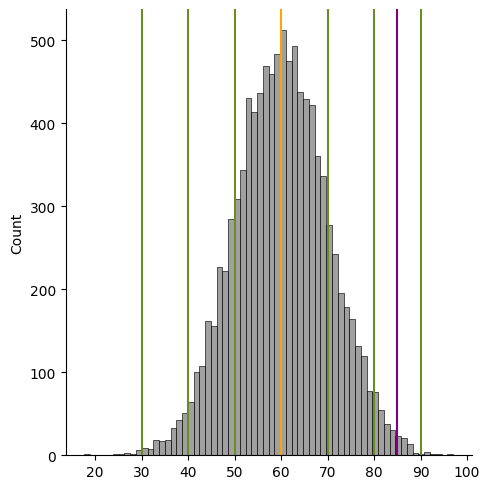

In [7]:
sns.displot(x, color='gray')
# ax.set_xlim(0, 100)
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

Z-Score kita adalah 2,5 dengan Standar Deviasi di atas rata-rata:

In [8]:
z = (x_i - mu)/sigma
z

2.5

Sebaliknya, jika skor rata-rata rekan Anda adalah 90 dan standar deviasinya adalah 2:

In [9]:
mu = 90
sigma = 2

In [10]:
y = np.random.normal(mu, sigma, 10000)

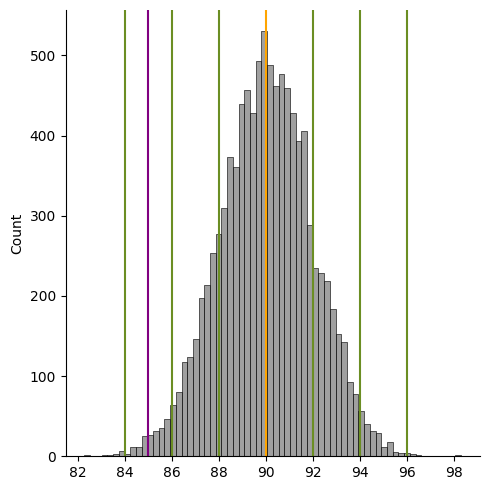

In [11]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')


Z-Score Anda adalah 2,5 dengan Standard Deviasi di bawah rata-rata:

In [12]:
z = (x_i - mu)/sigma
z

-2.5

Konvensi Frequentist menganggap titik data yang terletak lebih jauh dari tiga Standar Deviasi dari rata-rata dinyatakan menjadi **outlier**.

### *p*-values

*p*-values mengukur probabilitas *p*, bahwa pengamatan tertentu akan terjadi secara kebetulan saja.

Sebagai contoh, kita melihat bahwa dengan simulasi data hasil ujian sebanyak 10k, hanya 69 orang yang mencapai *z*-score di atas 2,5 dan hanya 67 (=10000-9993) yang mencapai *z*-score di bawah -2,5. Jadi, jika kita mengambil sampel secara acak salah satu dari 10k data hasil ujian, kita akan mengharapkannya berada di luar 2,5 (yaitu, +/- 2,5) dengan Standar Deviasi hanya 1,36% dari waktu:
$$ \frac{69+67}{10000} = 0,0136 = 1,36\% $$

Setara dengan peningkatan ukuran dengan simulasi data hasil ujian sebanyak 10k, probabilitas skor lebih dari 2,5 Standar Deviasi dari rata-rata distribusi normal dapat ditentukan dengan *fungsi distribusi kumulatif* (CDF):

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [14]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [15]:
p_below*10000

62.096653257761325

In [16]:
mu = 90
sigma = 2

y = np.random.normal(mu, sigma, 10000)

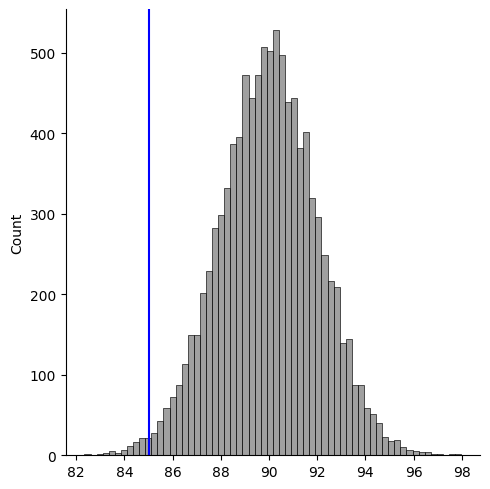

In [17]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [18]:
st.norm.cdf(2.5)

0.9937903346742238

In [19]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [20]:
p_above*10000

62.09665325776159

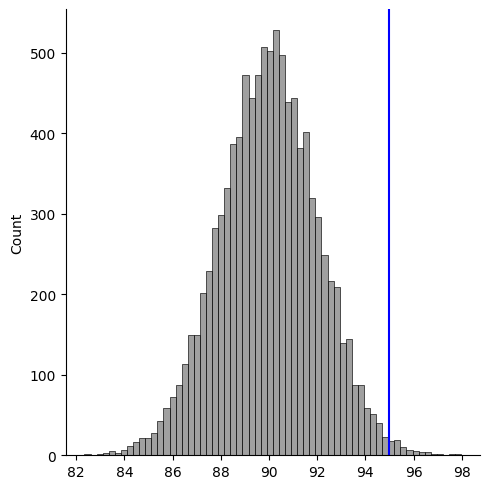

In [21]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [22]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [23]:
p_outside*10000

124.1933065155229

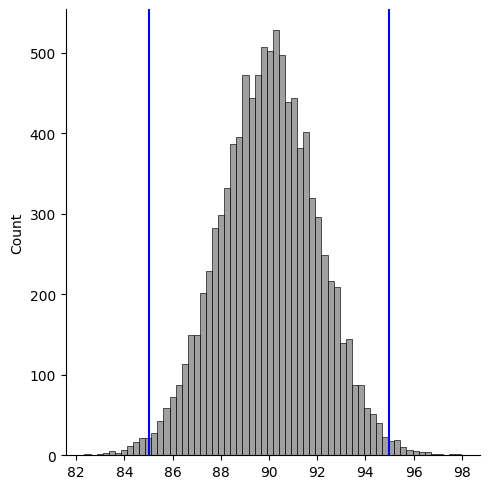

In [24]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

Dengan kata lain, dengan asumsi Distribusi Normal, probabilitas (nilai *p*) dari nilai sampel setidaknya 2,5 Standar Deviasi dari rata-rata secara kebetulan saja adalah $p \approx .0124$.


Konvensi Frequentist adalah bahwa jika nilai *p* kurang dari 0,05, kita dapat mengatakan bahwa itu adalah pengamatan "statistically significant". Kita biasanya menunjukkan ambang signifikansi ini dengan $\alpha$, misalnya, $\alpha = .05$.

Misalnya, dengan fair coin, probabilitas melempar enam kepala *atau* enam ekor dalam percobaan pelemparan enam koin adalah 0,03125 ($p = 0,015625$ untuk *salah satu dari* enam kepala atau enam ekor).

Jika seorang teman Anda memberikan Anda sebuah koin, **hipotesis nol** (dasar yang diasumsikan oleh distribusi lemparan wajar) adalah bahwa koin tersebut adil. Jika Anda menguji koin ini dengan membaliknya enam kali dan koin itu muncul dengan angka enam atau ekor pada keenamnya, pengamatan ini akan menyarankan bahwa Anda harus *menolak hipotesis nol* karena kebetulan saja akan memfasilitasi pengamatan seperti itu kurang dari 5% dari waktu, yaitu, $p < .05$.

*Z*-scores yang sesuai dengan $\alpha = .05$ dapat diperoleh dari *fungsi titik persen* (PPF) Distribusi Normal, yang memfasilitasi kebalikan dari CDF. Untuk menangkap 95% nilai di sekitar rata-rata, kita meninggalkan 2,5% di bagian bawah distribusi dan 2,5% di atas:

In [25]:
st.norm.ppf(.025)

-1.9599639845400545

In [26]:
st.norm.ppf(.975)

1.959963984540054

Sehingga, pada $\alpha = .05$ tradisional, nilai sampel dengan *z*-score kurang dari -1,96 atau lebih besar dari 1,96 akan dianggap signifikan secara statistik.

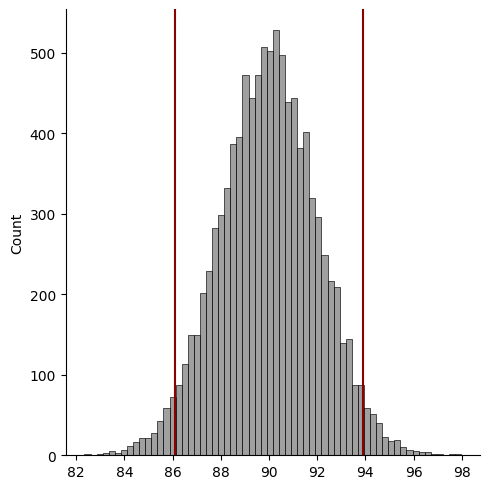

In [27]:
sns.displot(y, color='gray')
plt.axvline(mu+1.96*sigma, color='darkred')
_ = plt.axvline(mu-1.96*sigma, color='darkred')


Dengan ambang batas yang lebih ketat, katakan $\alpha = .01$:

In [28]:
st.norm.ppf(.005)

-2.575829303548901

In [29]:
st.norm.ppf(.995)

2.5758293035489004

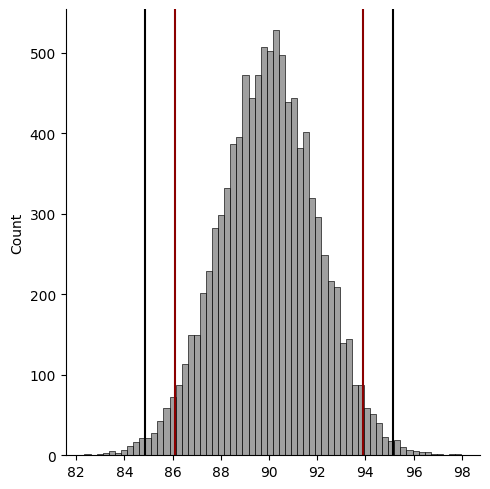

In [30]:
sns.displot(y, color='gray')

plt.axvline(mu+1.96*sigma, color='darkred')
plt.axvline(mu-1.96*sigma, color='darkred')

plt.axvline(mu+2.57*sigma, color='black')
_ = plt.axvline(mu-2.57*sigma, color='black')

### Comparing Means with *t*-tests

Di mana *z*-score hanya berlaku untuk *individual values*, *t*-tests memungkinkan kita untuk membandingkan (rata-rata) sampel dengan rata-rata referensi.

#### Student's Single-Sample *t*-test

Ditemukan William Sealy Gosset, seorang ilmuwan dan matematikawan lulusan Oxford, yang menjadi ahli statistik hasil yang kuat untuk Guinness di Dublin.

Cek rumus untuk menghitung *z*-score:
$$ z = \frac{x_i-\mu}{\sigma} $$

**single-sample *t*-test** adalah variasi pada tema dan ditentukan oleh:
$$ t = \frac{\bar{x} - \mu_0}{s_{\bar{x}}} $$
Di mana:
* $\bar{x}$ adalah rata-rata sampel
* $\mu_0$ adalah mean referensi, mis., mean populasi yang diketahui atau mean "hipotesis nol"
* $s_{\bar{x}}$ adalah contoh kesalahan standar

Asumsi terdapat data sebagai berikut:

In [31]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [32]:
x = [48, 50, 54, 60]

Kita dapat memperoleh *t*-statistic untuk sampel ini sebagai berikut:

In [33]:
xbar = np.mean(x)
xbar

53.0

In [34]:
sx = st.sem(x)
sx

2.6457513110645907

In [35]:
t = (xbar-50)/sx
t

1.1338934190276817

Kita dapat mengonversi *t*-value menjadi *p*-value menggunakan Student's *t*-distribution:

In [38]:
# -abs(2)

-2

In [39]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)

In [40]:
p_from_t(t, len(x))

0.3392540508564543

For everyday usage, however, we can rely on the SciPy `ttest_1samp()` method: 

In [41]:
st.ttest_1samp(x, 50)

TtestResult(statistic=1.1338934190276817, pvalue=0.3392540508564543, df=3)

#### Welch's Independent *t*-test

Dalam keadaan biasa, jika kita memiliki dua sampel yang artinya ingin kita bandingkan, kita menggunakan **independent *t*-test**.

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [ ]:
penguins = sns.load_dataset('penguins').dropna()

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
np.unique(penguins.species, return_counts=True)

(array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object),
 array([146,  68, 119]))

In [ ]:
adelie = penguins[penguins.species == 'Adelie']

In [ ]:
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [ ]:
np.unique(adelie.island, return_counts=True)

(array(['Biscoe', 'Dream', 'Torgersen'], dtype=object), array([44, 55, 47]))

In [ ]:
np.unique(adelie.sex, return_counts=True)

(array(['Female', 'Male'], dtype=object), array([73, 73]))

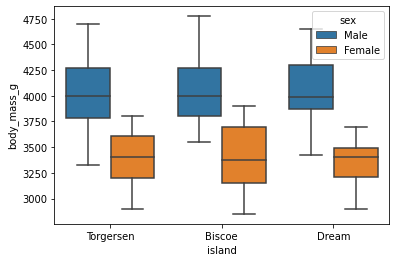

In [ ]:
_ = sns.boxplot(x='island', y='body_mass_g', hue='sex', data=adelie)

Mass tampaknya tidak bervariasi menurut island, jadi kita bisa merasa nyaman mengelompokkan data berdasarkan island. Namun, weight tampaknya bervariasi menurut sex, jadi mari kita lihat lebih dekat:

In [ ]:
f = adelie[adelie.sex == 'Female']['body_mass_g'].to_numpy()/1000
f

array([3.8  , 3.25 , 3.45 , 3.625, 3.2  , 3.7  , 3.45 , 3.325, 3.4  ,
       3.8  , 3.8  , 3.2  , 3.15 , 3.25 , 3.3  , 3.325, 3.55 , 3.3  ,
       3.15 , 3.1  , 3.   , 3.45 , 3.5  , 3.45 , 2.9  , 3.55 , 2.85 ,
       3.15 , 3.6  , 2.85 , 3.35 , 3.05 , 3.6  , 3.55 , 3.7  , 3.7  ,
       3.55 , 3.2  , 3.8  , 3.35 , 3.5  , 3.6  , 3.55 , 3.4  , 3.3  ,
       3.7  , 2.9  , 3.725, 3.075, 2.925, 3.75 , 3.175, 3.825, 3.2  ,
       3.9  , 2.9  , 3.35 , 3.15 , 3.45 , 3.05 , 3.275, 3.05 , 3.325,
       3.5  , 3.425, 3.175, 3.4  , 3.4  , 3.05 , 3.   , 3.475, 3.45 ,
       3.7  ])

In [ ]:
m = adelie[adelie.sex == 'Male']['body_mass_g'].to_numpy()/1000
m

array([3.75 , 3.65 , 4.675, 3.8  , 4.4  , 4.5  , 4.2  , 3.6  , 3.95 ,
       3.8  , 3.55 , 3.95 , 3.9  , 3.9  , 4.15 , 3.95 , 4.65 , 3.9  ,
       4.4  , 4.6  , 3.425, 4.15 , 4.3  , 4.05 , 3.7  , 3.8  , 3.75 ,
       4.4  , 4.05 , 3.95 , 4.1  , 4.45 , 3.9  , 4.15 , 4.25 , 3.9  ,
       4.   , 4.7  , 4.2  , 3.55 , 3.8  , 3.95 , 4.3  , 4.45 , 4.3  ,
       4.35 , 4.1  , 4.725, 4.25 , 3.55 , 3.9  , 4.775, 4.6  , 4.275,
       4.075, 3.775, 3.325, 3.5  , 3.875, 4.   , 4.3  , 4.   , 3.5  ,
       4.475, 3.9  , 3.975, 4.25 , 3.475, 3.725, 3.65 , 4.25 , 3.75 ,
       4.   ])

In [ ]:
fbar = f.mean()
fbar

3.368835616438356

In [ ]:
mbar = m.mean()
mbar

4.043493150684932

Untuk mengukur apakah berat male eight secara signifikan lebih banyak daripada perempuan, kita dapat menggunakan **Welch *t*-test**, yang dibuat pada tanggal 20 c. Ahli statistik Inggris Bernard Lewis Welch:
$$ t = \frac{\bar{x} - \bar{y}}{\sqrt{\frac{s^2_x}{n_x} + \frac{s^2_y}{n_y}}} $$
Di mana:
* $\bar{x}$ dan $\bar{y}$ adalah contoh cara
* $s^2_x$ dan $s^2_y$ adalah varians sampel
* $n_x$ dan $n_y$ adalah ukuran sampel

Student's independent *t*-test jelas lebih populer daripada Welch, tetapi Student's independent *t*-test mengasumsikan varians populasi yang sama (yaitu, $\sigma^2_x \approx \sigma^2_y$), membuatnya kurang kuat.

In [ ]:
sf = f.var(ddof=1)
sm = m.var(ddof=1)

In [ ]:
nf = f.size
nm = m.size

In [ ]:
t = (fbar-mbar)/(sf/nf + sm/nm)**(1/2)
t

-13.126285923485879

Derajat kebebasan untuk menghitung nilai *p* diperkirakan menggunakan [persamaan Welch–Satterthwaite], yang didefinisikan sebagai:

In [ ]:
def ws_eqn(sx, sy, nx, ny):
    return (sx / nx + sy / ny)**2 / (sx**2 / (nx**2 * (nx - 1)) + sy**2 / (ny**2 * (ny - 1)))

In [ ]:
df = ws_eqn(sf, sm, nf, nm)
df

135.69357893530386

In [ ]:
p = 2 * st.t.cdf(-abs(t), df)
p

6.402319748031518e-26

In [ ]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)

In [ ]:
p_from_t(t, df+1)

6.402319748031518e-26

In [ ]:
-np.log10(p)

25.193662639886046

In [ ]:
st.ttest_ind(f, m, equal_var=False) 

Ttest_indResult(statistic=-13.126285923485879, pvalue=6.402319748031518e-26)

#### Student's Paired *t*-test

Kadang-kadang, kita memiliki dua vektor di mana setiap elemen dalam vektor *x* memiliki elemen yang bersesuaian dalam vektor *y*.

Misalnya, kita dapat menjalankan eksperimen di mana pasien penyakit Alzheimer menerima obat pada suatu hari (kondisi eksperimental) dan plasebo pil gula (kondisi kontrol) pada hari lain. Kita kemudian dapat mengukur kelupaan pasien pada kedua hari untuk menguji apakah obat tersebut memiliki dampak yang signifikan pada memori.

Untuk ukuran sampel tertentu, uji *t* berpasangan semacam itu lebih kuat dibandingkan uji *t* yang tidak berpasangan (independen) karena varians dari *x* berhubungan langsung dengan varians dalam *y*: Alzheimer parah pasien akan cenderung relatif pelupa pada kedua hari tersebut, sedangkan pasien Alzheimer ringan akan cenderung relatif tidak pelupa pada kedua hari tersebut. Dengan sampel berpasangan, kami menangkap kekuatan ini dengan membandingkan *perbedaan* antara *x* dan *y*, misalnya, perbedaan kelupaan pasien tertentu saat diberi obat relatif dengan saat diberi pil gula.

Sebaliknya, pertimbangkan kumpulan data penguin, di mana kita tidak akan dapat dengan jelas memasangkan penguin jantan tertentu dengan penguin betina yang sesuai. Atau pertimbangkan situasi di mana kami menyediakan obat untuk satu set pasien Alzheimer sementara kami memberikan plasebo untuk seluruh kelompok pasien yang berbeda (independen). Memang, dengan uji *t* independen, kami bahkan dapat memiliki ukuran sampel yang berbeda di kedua kelompok, sedangkan ini tidak mungkin dilakukan dengan uji *t* berpasangan.

Contoh:

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [ ]:
exercise = sns.load_dataset('exercise')
exercise

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest
...,...,...,...,...,...,...
85,85,29,no fat,135,15 min,running
86,86,29,no fat,130,30 min,running
87,87,30,no fat,99,1 min,running
88,88,30,no fat,111,15 min,running



Ada 30 orang dalam kumpulan data, dengan denyut nadi mereka diambil pada tiga titik waktu yang berbeda dalam sebuah eksperimen (yaitu, setelah satu, 15, dan 30 menit). Sepuluh orang ditugaskan untuk masing-masing dari tiga kelompok kegiatan:

In [ ]:
np.unique(exercise.kind, return_counts=True)

(array(['rest', 'running', 'walking'], dtype=object), array([30, 30, 30]))

Dalam masing-masing kelompok aktivitas tersebut, setengah dari peserta menjalani diet rendah lemak sementara separuh lainnya menjalani diet tanpa lemak:

In [ ]:
np.unique(exercise.diet, return_counts=True)

(array(['low fat', 'no fat'], dtype=object), array([45, 45]))

Untuk mempermudah, mari kita pertimbangkan salah satu dari enam kelompok eksperimen, katakanlah para pelaku diet tanpa lemak yang berjalan kaki:

In [ ]:
walk_no = exercise[(exercise.diet == 'no fat') & (exercise.kind == 'walking')]
walk_no

In [ ]:
_ = sns.boxplot(x='time', y='pulse', data=walk_no)

In [ ]:
min1 = walk_no[walk_no.time == '1 min']['pulse'].to_numpy()
min1

In [ ]:
min1.mean()

In [ ]:
min15 = walk_no[walk_no.time == '15 min']['pulse'].to_numpy()
min15

In [ ]:
min15.mean()

In [ ]:
min30 = walk_no[walk_no.time == '30 min']['pulse'].to_numpy()
min30

In [ ]:
min30.mean()

In [ ]:
sns.scatterplot(x=min1, y=min15)
plt.title('Heart rate of no-fat dieters (beats per minute)')
plt.xlabel('After 1 minute walking')
_ = plt.ylabel('After 15 minutes walking')

Untuk menilai apakah detak jantung rata-rata bervariasi secara signifikan setelah satu menit berjalan relatif terhadap setelah 15 menit, kita dapat menggunakan **paired-sample** (alias, **dependen**) *t*-test Siswa:
$$ t = \frac{\bar{d} - \mu_0}{s_\bar{d}} $$
Di mana:
* $d$ adalah vektor selisih antara sampel berpasangan $x$ dan $y$
* $\bar{d}$ adalah rata-rata dari perbedaan
* $\mu_0$ biasanya akan menjadi nol, artinya hipotesis nol adalah bahwa tidak ada perbedaan antara $x$ dan $y$
* $s_\bar{d}$ adalah kesalahan standar dari perbedaan

In [ ]:
d = min15 - min1
d

In [ ]:
dbar = d.mean()
dbar

In [ ]:
sd = st.sem(d)
sd

In [ ]:
t = (dbar-0)/sd
t

In [ ]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)

In [ ]:
p_from_t(t, d.size)

In [ ]:
st.ttest_rel(min15, min1)

Sebaliknya, jika kita memasukkan nilai yang sama ke dalam uji *t*-independen.

In [ ]:
st.ttest_ind(min15, min1, equal_var=False)

### ANOVA: Analysis of Variance

**Analysis of variance** (ANOVA) memungkinkan kita untuk membandingkan lebih dari dua sampel dalam satu uji statistik.

Untuk menerapkan ANOVA, kita harus membuat tiga asumsi:
1. Sampel independen
2. Populasi yang terdistribusi normal
3. *Homoscedasticity*: Standar deviasi populasi sama

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [ ]:
penguins = sns.load_dataset('penguins').dropna()
adelie = penguins[penguins.species == 'Adelie']

t = adelie[(adelie.sex == 'Female') & (adelie.island == 'Torgersen')]['body_mass_g'].to_numpy()/1000
b = adelie[(adelie.sex == 'Female') & (adelie.island == 'Biscoe')]['body_mass_g'].to_numpy()/1000
d = adelie[(adelie.sex == 'Female') & (adelie.island == 'Dream')]['body_mass_g'].to_numpy()/1000

In [ ]:
st.f_oneway(t, b, d)

#### ANOVA: Analysis of Variance: Shoes

Selanjutnya kita akan mencoba mencari Anova pada Shoes Data. Data bisa diunduh pada tautan [ini](https://drive.google.com/file/d/1vNeyDPVdhdhrSp0Q3ddi9Dh0_pVIKVze/view?usp=sharing).

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
shoes = pd.read_csv('/content/shoes.csv')

t = shoes.current_price.to_numpy()/1000
b = shoes.raw_price.to_numpy()/1000

In [ ]:
st.f_oneway(t, b)

F_onewayResult(statistic=16461.782739732185, pvalue=0.0)

### Pearson Correlation Coefficient

Jika kita memiliki dua vektor dengan panjang yang sama, $x$ dan $y$, di mana setiap elemen $x$ dipasangkan dengan elemen $y$ yang sesuai, **covariance** memberikan ukuran seberapa terkait variabel tersebut satu sama lain:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} $$

Kelemahan covariance adalah bahwa hal itu mengacaukan skala relatif dua variabel dengan ukuran keterkaitan variabel. **Correlation** dibangun di atas covariance dan mengatasi kelemahan ini melalui penskalaan ulang, sehingga mengukur keterkaitan (linier) secara eksklusif. Korelasi jauh lebih umum karena perbedaan ini.

Correlation coefficient (dikembangkan oleh Karl Pearson pada abad ke-20 meskipun dikenal pada abad ke-19) sering dilambangkan dengan $r$ atau $\rho$ dan didefinisikan oleh:
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = iris.sepal_length
y = iris.petal_length

In [ ]:
sns.set_style('darkgrid')

In [ ]:
_ = sns.scatterplot(x=x, y=y)

In [ ]:
n = iris.sepal_width.size

In [ ]:
xbar, ybar = x.mean(), y.mean()

In [ ]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(product)/n
cov

In [ ]:
r = cov/(np.std(x)*np.std(y))
r

Kami mencapai titik ini di *Probabilitas*. Nah, untuk cara menentukan nilai *p*, kita hitung dulu *t*-statistiknya...
$$ t = r \sqrt{\frac{n-2}{1-r^2}} $$

In [ ]:
t = r*((n-2)/(1-r**2))**(1/2)
t

...yang dapat kita konversi ke nilai *p* seperti yang telah kita lakukan beberapa kali di atas:

In [ ]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)

In [ ]:
p = p_from_t(t, n-1) 
p

In [ ]:
-np.log10(p)

Ini menegaskan bahwa panjang kelopak iris berkorelasi sangat positif dengan panjang kelopak.

Semua hal di atas dapat dilakukan dalam satu baris dengan metode `pearsonr()` SciPy:

In [ ]:
st.pearsonr(x, y)

Dan, untuk referensi, inilah korelasi yang tidak signifikan ($r \approx 0$):

In [ ]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [ ]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

#### Pearson Correlation Coefficient: Shoes Data

Selanjutnya kita akan mencoba mencari Pearson Correlation Coefficient pada Shoes Data. Data bisa diunduh pada tautan [ini](https://drive.google.com/file/d/1vNeyDPVdhdhrSp0Q3ddi9Dh0_pVIKVze/view?usp=sharing).

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
shoes = pd.read_csv('/content/shoes.csv')

In [ ]:
shoes.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,shoes,Mocassins,Chaussures décontractées antidérapantes en tis...,36.40,72.80,USD,50,873,False,NaN,...,Black,Khaki,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flats-3616/p-1687903.html,1687903,SKUF29428
1,shoes,Mocassins,Chaussures en cuir à carreaux pour hommes de g...,46.36,106.49,USD,57,358,False,NaN,...,Red,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flats-3616/p-1533324.html,1533324,SKUC99128
2,shoes,Mocassins,Chaussures décontractées en cuir pour hommes,43.38,119.98,USD,64,1511,False,Menico,...,Black,Khaki,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/-menico-flats-3616/p-16...,1651734,SKUE68011
3,shoes,Sneakers & Baskets,Baskets plates élastiques en tricot d'épissage,19.99,39.99,USD,50,1873,False,NaN,...,Green,Blue,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/sneakersandathletic-359...,1591892,SKUD85085
4,shoes,Mocassins,Hommes Cuir Épissage Soft Semelle Casual Chaus...,46.18,119.98,USD,62,2738,False,NaN,...,Bleu,Noir,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/flats-3616/p-1474682.html,1474682,SKUC15622


Kita mencari korelasi antara kolom "current_price" dan "raw_price"

In [ ]:
x = shoes.current_price
y = shoes.raw_price

In [ ]:
sns.set_style('darkgrid')

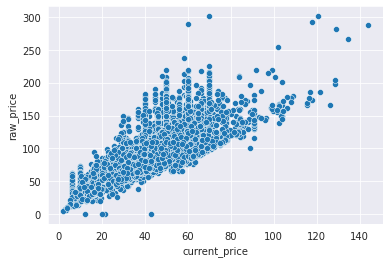

In [ ]:
_ = sns.scatterplot(x=x, y=y)

Jalan dengan menggunakan module `pearsonr()` dari library SciPy:

In [ ]:
st.pearsonr(x, y)

(0.8231363838924116, 0.0)

Hasilnya kolom "current_price" dan "raw_price" berkorelasi positif

### The Coefficient of Determination

...juga dikenal sebagai $r^2$, ini adalah proporsi varians dalam satu variabel yang dijelaskan oleh variabel lain.

Ini dapat berkisar dari 0 hingga 1 dan itu hanyalah kuadrat dari Pearson $r$:

In [ ]:
rsq = r**2
rsq

Dalam hal ini, menunjukkan bahwa 76% varians panjang kelopak iris dapat dijelaskan oleh panjang sepal.


Sebagai perbandingan, hanya 1,4% varians lebar sepal yang dapat dijelaskan dengan panjang sepal:

In [ ]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

## Distributions in Machine Learning

### Uniform

Suatu distribusi yang memiliki probabilitas konstan di seluruh rentang nilai dalam domainnya:

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
u = np.random.uniform(size=10000)

In [ ]:
sns.set_style('ticks')

In [ ]:
_ = sns.displot(u)

Contoh implementasi meliputi:

* Dice rolling (PMF)
* Card drawing (PMF)
* Model hyperparameters
* Emission of radioactive particles
* Economic demand 
* Analog-to-digital signal quantization errors

### Gaussian

Carl Friedrich Gauss (ahli matematika dan ilmuwan Jerman awal abad ke-19) menemukan konsep bernama Distribusi Gaussian, juga dikenal sebagai "kurva lonceng (bell curve)" atau **Distribusi Normal**:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x = np.random.normal(size=10000)

In [ ]:
_ = sns.displot(x)

In [ ]:
_ = sns.displot(x, kde=True)

Ketika Distribusi Normal memiliki rata-rata ($\mu$) nol dan Standar Deviasi ($\sigma$) satu, seperti yang dilakukan secara default dengan fungsi `normal()` dari NumPy.

In [ ]:
np.mean(x)

In [ ]:
np.std(x)

Berikut adalah **Distribusi Normal Standar/Standard Gaussian Distribution**. Distribusi Normal dapat dilambangkan dengan font *math calligraphy* sebagai $\mathcal{N}(\mu, \sigma^2)$, sehingga Distribusi Normal Standar dapat dilambangkan sebagai $\mathcal{N}(0, 1) $.

Distribusi Normal sejauh ini merupakan distribusi yang paling umum dalam Statistik dan Machine Learning. Mereka biasanya merupakan opsi default, terutama jika Anda memiliki informasi terbatas tentang proses acak yang Anda modelkan, karena:

1. Distribusi Normal mengasumsikan ketidakpastian terbesar yang mungkin tentang variabel acak yang diwakilinya (relatif terhadap distribusi varian ekuivalen lainnya).
2. Proses acak yang sederhana dan sangat kompleks sama-sama, dalam semua kondisi umum, terdistribusi secara normal ketika kita mengambil sampel nilai dari proses tersebut. Karena kami mengambil sampel data untuk model Statistik dan Machine Learning, apa yang disebut **Central Limit Theorem** adalah konsep yang sangat penting.

Contoh Implementasi

* Probability of heads across *n* tosses (PMF; $n = 5$ earlier, $n = 100$ below)
* Sum of di(c)e rolls (PMF)
* Height of adult women
* Height of adult men
* Education test scores, e.g., SAT

In [ ]:
n_experiments = 10000
heads_count = [np.random.binomial(100, 0.5) for i in range (n_experiments)]
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

In [ ]:
plt.bar(heads, event_proba)
_ = plt.xlabel('Heads flips (out of 100 tosses)')

### The Central Limit Theorem

Untuk mengembangkan pemahaman fungsional tentang CLT, mari kita contohkan beberapa nilai dari Distribusi Normal:

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x = np.random.normal(size=10000)
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

Rata-rata sampel tidak selalu mendekati nol dengan sampel sekecil itu:

In [ ]:
np.mean(x_sample)


Mari kita definisikan fungsi untuk menghasilkan **sampling distributions** dari rata-rata distribusi input yang diberikan:

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

Semakin banyak sampel yang kita ambil, semakin besar kemungkinan distribusi sampling rata-rata akan terdistribusi secara normal:

In [ ]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

Semakin besar sampel, maka semakin ketat rata-rata sampel yang berada di sekitar rata-rata populasi:

In [ ]:
sns.displot(sample_mean_calculator(x, 100, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [ ]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
s = st.skewnorm.rvs(10, size=10000)

In [ ]:
_ = sns.displot(s, kde=True)

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

In [ ]:
_ = sns.displot(sample_mean_calculator(s, 1000, 1000), color='green', kde=True)

#### Sampling from a multimodal distribution

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

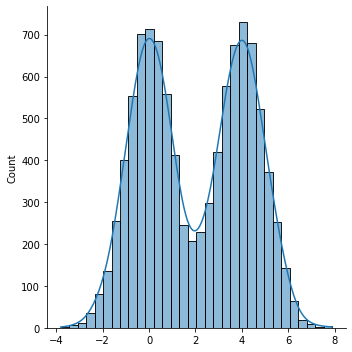

In [ ]:
_ = sns.displot(m, kde=True)

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

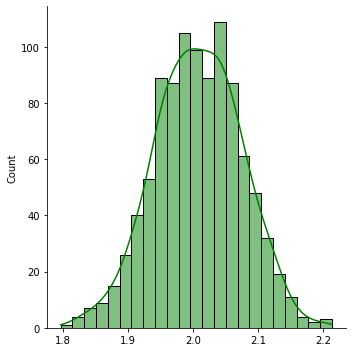

In [ ]:
_ = sns.displot(sample_mean_calculator(m, 1000, 1000), color='green', kde=True)

#### Sampling from uniform

Meskipun pengambilan sampel dari Uniform Distribution sangat tidak normal, Distribusi Sampel keluar dengan normal:

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
u = np.random.uniform(size=10000)

In [ ]:
_ = sns.displot(u)

In [ ]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

In [ ]:
_ = sns.displot(sample_mean_calculator(u, 1000, 1000), color='green', kde=True)

Oleh karena itu, dengan ukuran sampel yang cukup besar, kita dapat mengasumsikan Distribusi Sampling Rata-rata akan terdistribusi secara normal, memungkinkan kita untuk menerapkan model Statistik dan Machine Learning yang dikonfigurasi untuk normally distributed noise, yang seringkali merupakan default assumption.

Sebagai contoh, "*t*-test" memungkinkan kita untuk menyimpulkan apakah dua sampel berasal dari populasi yang berbeda (Contoh populasi yang berbeda, kelompok eksperimen yang menerima perlakuan dan kelompok kontrol yang menerima plasebo ). Berkat CLT, kita dapat menggunakan tes ini bahkan jika kita tidak tahu apa distribusi dasar dari populasi yang diuji, yang mungkin lebih sering terjadi daripada tidak.

### Log-Normal Distribution

The natural logarithm dari distribusi **log-normal**, terdistribusi secara normal:

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.lognormal(size=10000)

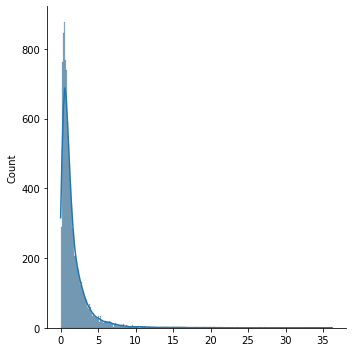

In [ ]:
_ = sns.displot(x, kde=True)

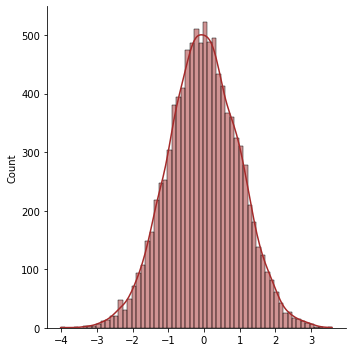

In [ ]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Contoh kasus: 

* Income
* Length of comments in online forums
* Duration of chess games or Rubik's Cube solves
* Size of publicly-available video files 
* Number of hospitalized cases in an epidemic where public interventions are involved

### Exponential Distribution

Mulanya terpusat pada angka dan kemudian menurun secara eksponensial menuju nilai yang lebih tinggi. Distribusi log-normal, sebaliknya, dapat mengambil nilai negatif dan keduanya meningkat dan menurun.

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.exponential(scale=4, size=10000) # "scale" parameter defaults to one

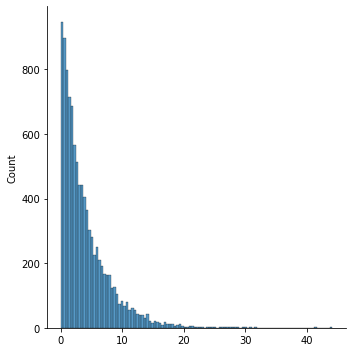

In [ ]:
_ = sns.displot(x)

Logarithm nya memiliki Skewed Distribution:

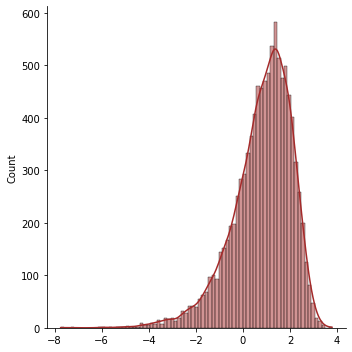

In [ ]:
_ = sns.displot(np.log(x), color='brown', kde=True)

Contoh kasus: 

* Time between requests to access Wikipedia pages
* Used frequently in deep learning

### Laplace Distribution

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.random.laplace(size=10000)

Nama lainnya adalah "Double Exponential Distribution":

In [ ]:
_ = sns.displot(x, kde=True)

Selain parameter skala fungsi eksponensial, ia memiliki parameter lokasi yang memungkinkannya dipusatkan pada nilai apa pun:

In [ ]:
_ = sns.displot(np.random.laplace(loc=25, size=10000), kde=True)

Contoh kasus: 

* Extreme weather events, e.g., maximum rainfall in a day
* Many machine learning applications; wherever an acute peak of probability is desired

### Binomial Distribution

Semua distribusi yang sebelumnya kita bahas termasuk variabel kontinu (PDF). Nah, yang kita bahas sekarang ini berupaka variabel diskrit (PMF).

Kita telah menggunakannya untuk coin flips; ini digunakan untuk kasus biner (0 atau 1).

Parameternya adalah:

* *n*: jumlah percobaan
* *p*: probabilitas hasil
* *ukuran*: jumlah percobaan dengan *n* percobaan masing-masing

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 5
n_experiments = 1000

#### Fair coin (p = 0.5)

In [ ]:
heads_count = np.random.binomial(n, 0.5, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

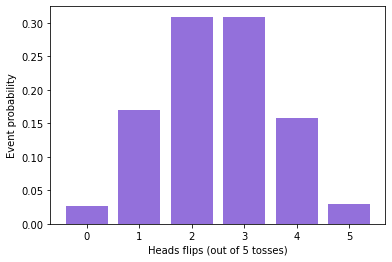

In [ ]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')

#### Weighted coin (p = 0.8)

In [ ]:
heads_count = np.random.binomial(n, 0.8, n_experiments)
heads, event_count = np.unique(heads_count, return_counts=True)
event_proba = event_count/n_experiments

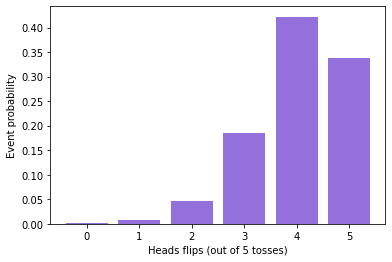

In [ ]:
plt.bar(heads, event_proba, color='mediumpurple')
plt.xlabel('Heads flips (out of 5 tosses)')
_ = plt.ylabel('Event probability')


Secara teknis, Distribusi Binomial dibuat dengan mengambil sampel $n>1$ "Uji coba Bernoulli". Distribusi **Bernoulli** setara dengan Distribusi Binomial di mana $n=1$:

In [ ]:
np.random.binomial(1, 0.5)

0

Contoh kasus:

* Making it to work on time
* Candidate being invited to interview
* Epidemiology: probability of death or catching disease

### Multinomial Distribution

Generalisasi Distribusi Binomial ke Discrete Random Variables dengan lebih dari dua kemungkinan hasil, misalnya, pelemparan dadu:

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
n = 1000

In [ ]:
rolls = np.random.multinomial(n, [1/6.]*6)
rolls

In [ ]:
event_proba = rolls/n

In [ ]:
plt.bar(range(1, 7), event_proba, color='mediumpurple')
plt.xlabel('Die roll')
_ = plt.ylabel('Event probability')

Seperti dalam kasus Binomial, Distribusi Multinomial dibuat dengan mengambil sampel Distribusi Multinoulli $n>1$, di mana Distribusi Multinoulli ekuivalen dengan Distribusi Multinomial ketika $n=1$:

In [ ]:
np.random.multinomial(1, [1/6.]*6)

Karena Distribusi Multinomial dapat mewakili variabel kategori apa pun (mis., burger, hot dog, pizza; 52 kartu remi; tim NFL), bukan hanya nilai integer, kita tidak selalu dapat menghitung nilai yang diharapkan.

### Poisson Distribution

**Poisson** adalah distribusi ketiga yang banyak digunakan untuk variabel acak diskrit. Distribusi ini ditemukan oleh ahli matematika Prancis Simeon Denis Poisson dan digunakan untuk menghitung data, misalnya:

* Number of cars that drive by in a minute
* Number of guests at restaurant in an evening
* Number of new hires in a month

Argumen pertama untuk metode `poisson()` dari NumPy adalah $\lambda$, yang harus lebih besar dari nol dan memandu puncak Distribusi Probabilitas. Misalnya, pengambilan sampel dari Poisson dengan $\lambda=5$ akan cenderung menarik sampel mendekati 5.

In [ ]:
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
lam=5

Argumen kedua adalah jumlah sampel yang akan diambil:

In [ ]:
n=1000

In [ ]:
samples = np.random.poisson(lam, n) 

In [ ]:
samples[0:20]

In [ ]:
x, x_count = np.unique(samples, return_counts=True)

In [ ]:
x

In [ ]:
x_count

In [ ]:
Px = x_count/n

In [ ]:
plt.bar(x, Px, color='mediumpurple')
plt.title('PMF of Poisson with lambda = {}'.format(lam))
plt.xlabel('x')
_ = plt.ylabel('P(x)')

## Information Theory

Formula dari Information Theory adalah: 
$$ I(x)=-\text{log}P(x) $$

In [ ]:
import numpy as np

In [ ]:
def self_info(my_p):
    return -1*np.log(my_p)

In [ ]:
self_info(1)

In [ ]:
self_info(0.1)

In [ ]:
self_info(0.01)

In [ ]:
self_info(0.5)

In [ ]:
self_info(0.5) + self_info(0.5)

Bergantung pada basis logarithm yang kita gunakan, unit self-information bervariasi. Paling sering, unitnya adalah:

* **nat**:
     * Logarithm natural, seperti `np.log()`
     * Khas dalam ML
* **bit**:
     * Logarithm Basis-2
     * A.k.a. **shannon**
     * Khas dalam ilmu komputer

Jadi, self-information $P(x) = 0,1$ adalah ~2,3 nats.

### Shannon and Differential Entropy

Untuk mengukur ketidakpastian tentang Distribusi Probabilitas (sebagai lawan dari satu peristiwa), kita dapat menggunakan **Shannon entropy**, yang dinotasikan $H(x)$ atau $H(P)$:
$$ H(x) = \mathbb{E}_{\text{x}\sim P}[I(x)] \\
= -\mathbb{E}_{\text{x}\sim P}[\text{log}P(x)] $$

Menyampaikan konten informasi yang diharapkan terkait dengan peristiwa yang diambil dari distribusi:
* **Low entropy**:
     * Distribusi ~deterministik dan hasilnya ~pasti
     * Misalnya, koin tertimbang selalu mendarat di atas ($P(1)=1$)
* **High entropy**:
     * Hasil tidak pasti
     * Distribusi Uniform dapat menjadi entropi tertinggi
     * Misalnya, koin kemungkinan besar menjadi kepala dan ekor ($P(0)=P(1)=0,5$)

Sebagai contoh, Shannon Entropy untuk binary random variable (misalnya, flip koin) adalah:
$$ (p-1)\text{log}(1-p)-p \text{log}p $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def binary_entropy(my_p):
    return (my_p-1)*np.log(1-my_p) - my_p*np.log(my_p)

Akan mengeluarkan `nan` dengan $p=0$ (selalu ekor) atau $p=1$ (selalu head), tetapi kita bisa mendekati:

In [ ]:
binary_entropy(0.00001)

In [ ]:
binary_entropy(0.99999)

In [ ]:
binary_entropy(0.9)

In [ ]:
binary_entropy(0.5)

In [ ]:
p = np.linspace(0.001, 0.999, 1000) # start, finish, n points

In [ ]:
H = binary_entropy(p)

In [ ]:
fig, ax = plt.subplots()
plt.title('Shannon entropy of Bernoulli trial')
plt.xlabel('p')
plt.ylabel('H (nats)')
_ = ax.plot(p,H)


**Differential Entropy**: istilah sederhana untuk Shannon entropy jika distribusinya adalah PDF

### Kullback-Leibler Divergence

**KL divergence** enables us to quantify the relative Shannon (or differential) entropy of two probability distributions that are over the same random variable x.

For example, if we have one probability distribution described by $P(x)$ and another by $Q(x)$, their KL divergence (denoted $D_\text{KL}$) is: 
$$ D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x)] $$

**KL divergence** memungkinkan kita untuk menghitung Shannon Entropy relatif dari dua distribusi probabilitas yang berada di atas variabel acak yang sama x.

Misalnya, jika kita memiliki satu distribusi probabilitas yang dijelaskan oleh $P(x)$ dan yang lainnya oleh $Q(x)$, divergensi KL-nya (dilambangkan $D_\text{KL}$) adalah:
$$ D_\text{KL}(P||Q) = \mathbb{E}_{\text{x} \sim P}[\text{log}P(x) - \text{log}Q(x )] $$

#### Cross-Entropy

## Regression

### Linear Least Squares for Fitting a Line to Points on a Cartesian Plane

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
x = iris.sepal_length
y = iris.petal_length

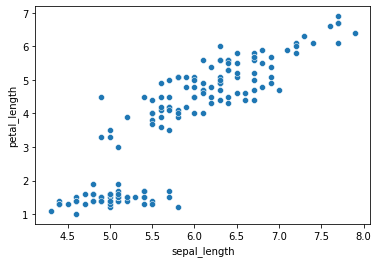

In [ ]:
_ = sns.scatterplot(x=x, y=y)

Pertimbangkan untuk memasang garis ke titik-titik pada **bidang Cartesius** (permukaan 2-D, dengan sumbu $y$ tegak lurus terhadap sumbu horizontal $x$). Agar sesuai dengan garis seperti itu, satu-satunya parameter yang kita butuhkan adalah $y$-intercept (misalnya, $\beta_0$) dan kemiringan (misalnya, $\beta_1$):

$$ y = \beta_0 + \beta_1 x $$

Ini sesuai dengan kasus di mana kita memiliki fitur tunggal (variabel prediktor tunggal, $x$) dalam model regresi:

$$ y = \beta_0 + \beta_1 x + \epsilon $$

Istilah $\epsilon$ menunjukkan **error**. Untuk contoh tertentu $i$, $\epsilon_i$ adalah ukuran perbedaan antara $y_i$ yang sebenarnya dan estimasi model, $\hat{y}_i$. Jika model memprediksi $y_i$ dengan sempurna, maka $\epsilon_i = 0$.

Tujuan kami adalah menemukan parameter $\beta_0$ dan $\beta_1$ yang meminimalkan $\epsilon$ di semua titik data yang tersedia.



Dalam kasus model dengan satu prediktor $x$, ada rumus **kuadrat terkecil linear** yang cukup sederhana yang dapat kita gunakan untuk memperkirakan $\beta_1$:
$$ \hat{\beta}_1 = \frac{\text{cov}(x,y)}{\sigma^2_x} $$

In [ ]:
n = iris.sepal_width.size

In [ ]:
xbar, ybar = x.mean(), y.mean()

In [ ]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(product)/n
cov

1.2658200000000006

In [ ]:
cov

1.2658200000000006

In [ ]:
beta1 = cov/np.var(x) 
beta1

1.8584329782548417

Dengan $\hat{\beta}_1$ di tangan, kita kemudian dapat mengatur ulang persamaan garis ($y = \beta_0 + \beta_1 x$) untuk memperkirakan $\beta_0$:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [ ]:
beta0 = ybar - beta1*xbar 
beta0

-7.101443369602459

In [ ]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

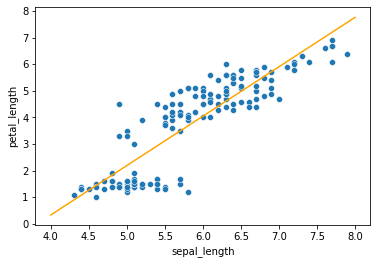

In [ ]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='orange')

Dalam istilah model regresi, jika kita diberikan panjang sepal $x_i$ kita sekarang dapat menggunakan parameter estimasi $\hat{\beta}_0$ dan $\hat{\beta}_1$ untuk memprediksi panjang kelopak iris :
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

Misalnya, model kami memprediksi bahwa iris dengan sepal sepanjang 5,5 cm akan memiliki kelopak sepanjang 3,1 cm:

In [ ]:
x_i = 5.5

In [ ]:
y_i = beta0 + beta1*x_i
y_i

3.1199380107991708

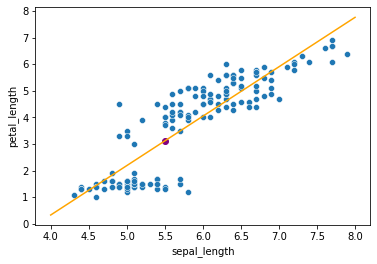

In [ ]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

Sebagai contoh kedua, menggunakan simulasi data "Alzheimer's drug" yang sama:

In [ ]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7.])
y = np.array([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

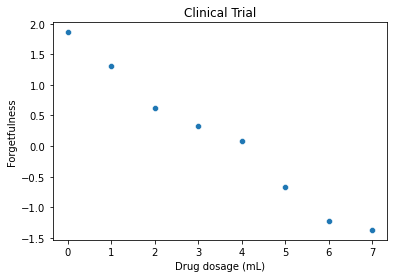

In [ ]:
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
_ = plt.ylabel("Forgetfulness")

In [ ]:
cov_mat = np.cov(x, y)
cov_mat

array([[ 6.        , -2.81571429],
       [-2.81571429,  1.34362143]])

In [ ]:
beta1 = cov_mat[0,1]/cov_mat[0,0]
beta1

-0.4692857142857143

In [ ]:
beta0 = y.mean() - beta1*x.mean()
beta0

1.76

In [ ]:
xline = np.linspace(0, 7, 1000)
yline = beta0 + beta1*xline

Dengan memberikan 4,5mL drug, model kami memprediksi forgetfulness score -0,35:

In [ ]:
x_i = 4.5

In [ ]:
y_i = beta0 + beta1*x_i
y_i

-0.35178571428571437

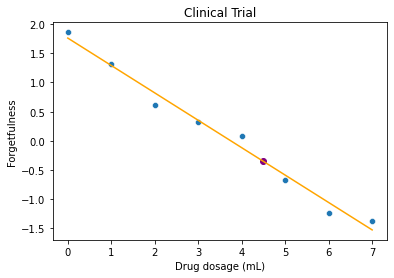

In [ ]:
sns.scatterplot(x=x, y=y)
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Forgetfulness")
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

### Ordinary Least Squares


**Ordinary least squares** (OLS) adalah metode linear least squares yang dapat kita gunakan untuk memperkirakan parameter model regresi yang memiliki lebih dari satu variabel prediktor, mis.:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \epsilon $$

Generalisasi ke $m$ prediktor:
$$ y = \beta_0 + \sum_{j=1}^m \beta_j x_j + \epsilon $$

Namun, untuk membuat perhitungan sesederhana mungkin, untuk saat ini kita akan tetap menggunakan satu prediktor $x$ (dalam contoh yang diadaptasi dari [di sini](https://en.wikipedia.org/wiki/Linear_least_squares#Example) ):

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns

In [ ]:
x = np.array([1, 2, 3, 4.])
y = np.array([6, 5, 7, 10.])

In [ ]:
sns.set_style('whitegrid')

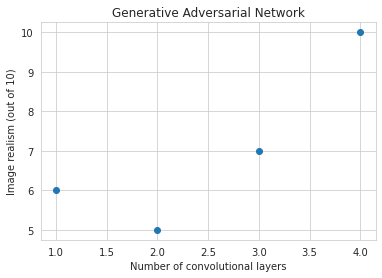

In [ ]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
_ = ax.scatter(x, y)

Seperti tipikal dalam penyesuaian model regresi, kami memiliki sistem persamaan aljabar linier *terlalu ditentukan*. Dari persamaan regresi umum $y = \beta_0 + \beta_1 x$, kami memiliki empat persamaan (satu untuk setiap instance $i$) dengan dua parameter yang tidak diketahui $\beta_0$ dan $\beta_1$ dibagi di seluruh sistem.
$$ 6 = \beta_0 + \beta_1 $$
$$ 5 = \beta_0 + 2\beta_1 $$
$$ 7 = \beta_0 + 3\beta_1 $$
$$ 10 = \beta_0 + 4\beta_1 $$

Karena kita memiliki lebih banyak persamaan daripada yang tidak diketahui, kita tidak dapat menyelesaikan parameter melalui penyusunan ulang aljabar. Namun, kita dapat memperkirakan parameter yang secara mendekati menyelesaikan semua persamaan dengan *Moore-Penrose Pseudoinverse* atau kita bisa menggunakan kalkulus turunan parsial seperti yang akan kita gunakan di sini. Either way, dengan pendekatan OLS, tujuan kita adalah untuk meminimalkan "jumlah kesalahan kuadrat" (SSE).

Squared error (alias quadratic cost, dari *Kalkukus*) untuk instance tertentu $i$ adalah $(\hat{y}_i-y_i)^2$.

SSE lebih dari $n$ instance kemudian:
$$ \sum_{i=1}^n (\hat{y}_i-y_i)^2 $$

Dalam kasus ini, di mana $\hat{y}_i = \beta_0 + \beta_1 x_i$, kita dapat mendefinisikan fungsi SSE sebagai:
$$ S(\beta_0, \beta_1) = \sum_{i=1}^n (\beta_0 + \beta_1 x_i - y_i)^2 $$

Memperluas penjumlahan di atas empat contoh $i$:
$$ S(\beta_0, \beta_1) = [\beta_0 + \beta_1 - 6]^2 + [\beta_0 + 2\beta_1 - 5]^2 + [\beta_0 + 3\beta_1 - 7]^2 + [ \beta_0 + 4\beta_1 - 10]^2 $$

Kemudian (dengan susah payah) memperluas kotak dan menyederhanakan hasilnya dengan menggabungkan suku-suku serupa:
$$ S(\beta_0, \beta_1) = 4\beta_0^2 + 30\beta_1^2 + 20\beta_0\beta_1 - 56\beta_0 - 154\beta_1 + 210 $$

Untuk meminimalkan SSE, sekarang kita dapat menggunakan turunan parsial. Khususnya, untuk menemukan di mana tidak ada kemiringan $S(\beta_0, \beta_1)$ terhadap $\beta_0$:
$$ \frac{\partial S}{\partial \beta_0} = 8\beta_0 + 20\beta_1 - 56 = 0 $$
...dan $\beta_1$:
$$ \frac{\partial S}{\partial \beta_1} = 20\beta_0 + 60\beta_1 - 154 = 0 $$

Menata ulang, kita memperoleh sistem dua persamaan linier yang disebut **persamaan normal** (berapa banyak parameter dalam model adalah berapa banyak baris persamaan yang akan kita miliki dalam sistem):
$$ 8\beta_0 + 20\beta_1 = 56 $$
$$ 20\beta_0 + 60\beta_1 = 154 $$

Pendekatan numerik praktis untuk menyelesaikan $\beta_0$ dan $\beta_1$ adalah inversi matriks.

Untuk menghindari kebingungan dengan variabel $x$ (jumlah lapisan konv GAN) dan $y$ yang lebih luas (realisme gambar), mari gunakan $A$ untuk matriks "input" dan $z$ untuk vektor "output" , dengan vektor $w$ yang berisi bobot yang tidak diketahui $\beta_0$ dan $\beta_1$:
$$ Aw = z $$

In [ ]:
A = np.array([[8, 20],[20, 60]])
A

array([[ 8, 20],
       [20, 60]])

In [ ]:
z = np.array([56, 154])

Untuk memecahkan $w$, kita dapat membalikkan $A$ (dengan asumsi $A$ tidak tunggal; yaitu, semua kolomnya independen):
$$ w = A^{-1}z $$

In [ ]:
Ainv = np.linalg.inv(A)
Ainv

array([[ 0.75, -0.25],
       [-0.25,  0.1 ]])

In [ ]:
w = np.dot(Ainv, z)
w

array([3.5, 1.4])

Jadi, garis yang meminimalkan squared error pada keempat persamaan memiliki parameter $\hat{\beta}_0 = 3,5$ dan $\hat{\beta}_1 = 1,4$:
$$ \hat{y} = 3,5 + 1,4 x $$

In [ ]:
xline = np.linspace(1, 4, 1000)
yline = w[0] + w[1]*xline

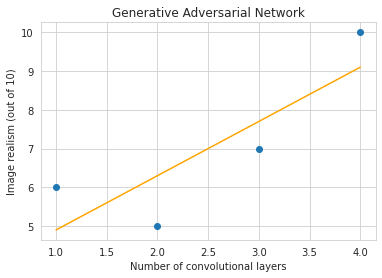

In [ ]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')

Kita dapat menampilkan $\hat{y}$ di semua instance $i$:
$$ \hat{y} = Xw $$

In [ ]:
X = np.concatenate([np.matrix(np.ones(x.size)).T, np.matrix(x).T], axis=1)
X

matrix([[1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.]])

In [ ]:
yhat = np.dot(X, w)
yhat

matrix([[4.9, 6.3, 7.7, 9.1]])

Kebetulan, **sisa** adalah jarak antara $\hat{y}_i$ dan $y_i$:

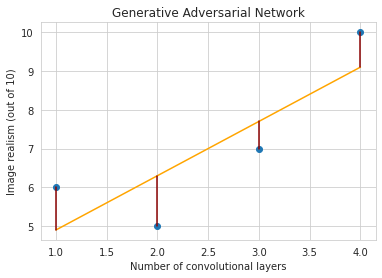

In [ ]:
fig, ax = plt.subplots()
plt.title('Generative Adversarial Network')
plt.xlabel('Number of convolutional layers')
plt.ylabel('Image realism (out of 10)')
ax.scatter(x, y)
_ = plt.plot(xline, yline, color='orange')
for i in range(x.size):
    plt.plot([x[i],x[i]], [y[i],yhat[0,i]], color='darkred')

Kuadrat dari residual ini adalah yang kami perkecil dengan SSE dalam regresi OLS.

Pendekatan OLS di atas meluas ke berbagai keadaan:

* Beberapa fitur ($x$, prediktor)
* Fitur polinomial (biasanya kuadrat), mis., $y = \beta_0 + \beta_1 x + \beta_2 x^2$
* Fitur yang berinteraksi, mis., $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2$
* Diskrit, fitur kategoris, termasuk. kombinasi fitur kontinu dan diskrit

Sebagai contoh yang terakhir...

In [ ]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
sns.set_style('darkgrid')

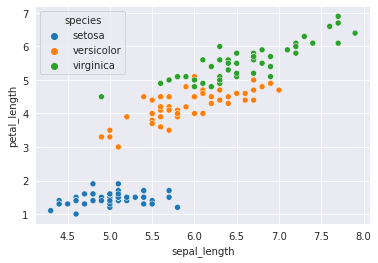

In [ ]:
_ = sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)

In [ ]:
import pandas as pd

In [ ]:
dummy = pd.get_dummies(iris.species)
dummy

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [ ]:
y = iris.petal_length

In [ ]:
X = pd.concat([iris.sepal_length, dummy.setosa, dummy.versicolor], axis=1)
X

,sepal_length,setosa,versicolor
0,5.1,1,0
1,4.9,1,0
2,4.7,1,0
3,4.6,1,0
4,5.0,1,0
...,...,...,...
145,6.7,0,0
146,6.3,0,0
147,6.5,0,0
148,6.2,0,0


In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,sepal_length,setosa,versicolor
0,1.0,5.1,1,0
1,1.0,4.9,1,0
2,1.0,4.7,1,0
3,1.0,4.6,1,0
4,1.0,5.0,1,0
...,...,...,...,...
145,1.0,6.7,0,0
146,1.0,6.3,0,0
147,1.0,6.5,0,0
148,1.0,6.2,0,0


In [ ]:
model = sm.OLS(y, X)

In [ ]:
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           petal_length   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1890.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          1.46e-116
Time:                        13:46:59   Log-Likelihood:                -21.237
No. Observations:                 150   AIC:                             50.47
Df Residuals:                     146   BIC:                             62.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3877      0.301      4.611      0.000       0.793       1.982
sepal_length     0.6321      0.045     13.962      0.000       0.543       0.722
setosa          -3.0900      0.091    -33.870      0.000      -3.270      -2.910
versicolor      -0.8799      0.064    -13.800      0.000      -1.006      -0.754
==============================================================================
Omnibus:                        0.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.722   Jarque-Bera (JB):                0.310
Skew:                          -0.022   Prob(JB):                        0.856
Kurtosis:                       3.218   Cond. No.                         82.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model iris kami sebelumnya, dengan panjang sepal sebagai satu-satunya prediktor panjang kelopak, memiliki $r^2 = 0,76$. Dalam model iris terbaru kami, 97% variasi panjang kelopak dijelaskan oleh prediktor.

In [ ]:
beta = result.params
beta

const           1.387660
sepal_length    0.632110
setosa         -3.090002
versicolor     -0.879864
dtype: float64

In [ ]:
xline = np.linspace(4, 8, 1000)
vi_yline = beta[0] + beta[1]*xline
se_yline = beta[0] + beta[1]*xline + beta[2]
ve_yline = beta[0] + beta[1]*xline + beta[3]

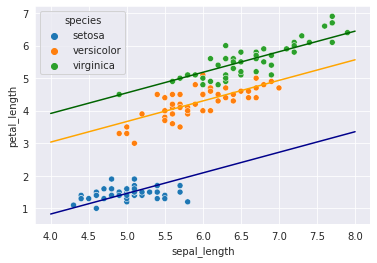

In [ ]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='orange')

Sekarang menggunakan model kami yang disempurnakan, sehingga memprediksi panjang kelopak iris *versicolor* dengan sepal sepanjang 5,5cm:

In [ ]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 1

In [ ]:
y_i = beta[0] + beta[1]*x_sepall_i + beta[2]*x_setosa_i + beta[3]*x_versic_i

In [ ]:
y_i

3.984400080089945

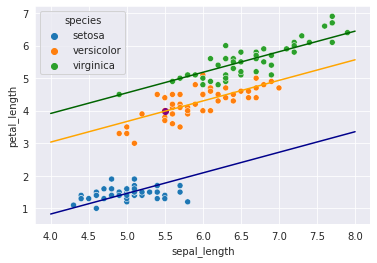

In [ ]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_sepall_i, y_i, marker='o', color='purple')

...atau *virginica* dengan sepal yang panjangnya sama:

In [ ]:
x_sepall_i = 5.5
x_setosa_i = 0
x_versic_i = 0

In [ ]:
x_i = np.array([1, x_sepall_i, x_versic_i, x_versic_i])

In [ ]:
y_i = np.dot(beta, x_i)

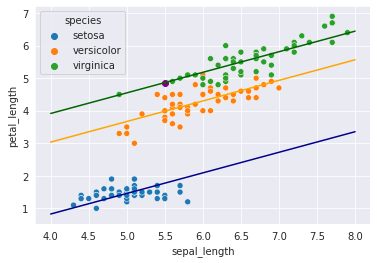

In [ ]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
plt.plot(xline, ve_yline, color='orange')
_ = plt.scatter(x_i[1], y_i, marker='o', color='purple')

### Regression: House Data

Selanjutnya kita akan mencoba mencari Regression pada House Data. Data bisa diunduh pada tautan [ini](https://drive.google.com/file/d/1n0LqS2J-KAN4dhZxOlsiXFFUz9u8hNyq/view?usp=sharing).

#### Linear Least Squares for Fitting a Line to Points 

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
house = pd.read_csv('/content/house.csv')

In [ ]:
house.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,house,Flowers,150pcs / pack de graines de fleurs Hosta,4.99,8.99,USD,45,867,False,Egrow,...,Violet,vert,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/egrow-flowers-8679/p-13...,1317953,SKU967403
1,house,Home Carpets,Tapis de maison antidérapants de style floral ...,16.17,43.74,USD,63,703,False,DecBest,...,#1,#2,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/decbest-home-carpets-72...,1496436,SKUC30634
2,house,Outdoor Tools,IPRee ™ 30KN Rappel d'escalade Dscender Eight ...,14.99,25.99,USD,42,52,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/upload/2...,https://fr.newchic.com/outdoor-tools-7288/p-90...,907293,SKU093263
3,house,Outdoor Tools,Bâton d'auto-défense à poteau télescopique à 3...,13.99,34.97,USD,60,120,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/outdoor-tools-7288/p-13...,1339082,SKUA06367
4,house,Fournitures de nettoyage,Couvre-pied jetable automatique pour machine à...,74.99,151.24,USD,50,222,False,NaN,...,#1,#2,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/cleaning-supplies-4918/...,1664674,SKUF00488


In [ ]:
x = house.current_price
y = house.raw_price

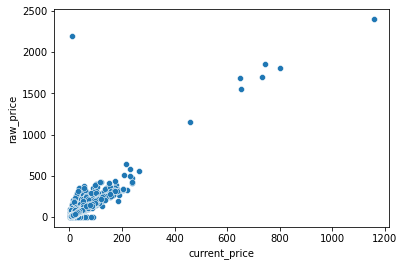

In [ ]:
_ = sns.scatterplot(x=x, y=y)

In [ ]:
n = house.current_price.size

In [ ]:
xbar, ybar = x.mean(), y.mean()

In [ ]:
product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [ ]:
cov = sum(product)/n
cov

1435.0436367059783

In [ ]:
cov

1435.0436367059783

In [ ]:
beta1 = cov/np.var(x) 
beta1

2.1270280935066213

Setelah mendapatkan $\hat{\beta}_1$, kita kemudian dapat mengatur ulang persamaan garis ($y = \beta_0 + \beta_1 x$) untuk memperkirakan $\beta_0$:
$$ \hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x} $$

In [ ]:
beta0 = ybar - beta1*xbar 
beta0

-1.2018875093044699

In [ ]:
xline = np.linspace(4, 8, 1000)
yline = beta0 + beta1*xline

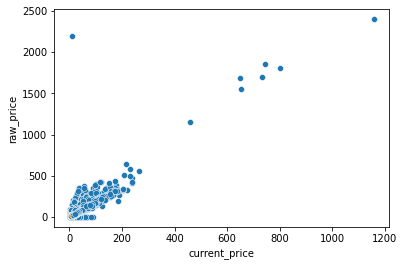

In [ ]:
sns.scatterplot(x=x, y=y)
_ = plt.plot(xline, yline, color='orange')

Dalam model regresi, jika kita diberikan 'current_price' $x_i$ kita sekarang dapat menggunakan parameter estimasi $\hat{\beta}_0$ dan $\hat{\beta}_1$ untuk memprediksi 'raw_price' :
$$ \hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i $$

Misal kita akan memprediksi 'raw_price' dari 'current_price' sebesar 80.55:

In [ ]:
x_i = 80.55

In [ ]:
y_i = beta0 + beta1*x_i
y_i

170.13022542265387

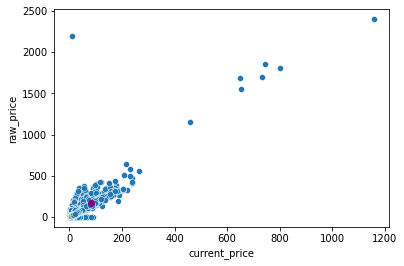

In [ ]:
sns.scatterplot(x=x, y=y)
plt.plot(xline, yline, color='orange')
_ = plt.scatter(x_i, y_i, marker='o', color='purple')

Terlihat 'raw_price' dari 'current_price' sebesar 80.55 adalah 170.1.

#### Ordinary Least Squares
Kita akan menggunakan **Ordinary least squares** (OLS) untuk memperkirakan parameter model dari beberapa variabel untuk memprediksi 'raw_price'.

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
house = pd.read_csv('/content/house.csv')

In [ ]:
house.head()

,category,subcategory,name,current_price,raw_price,currency,discount,likes_count,is_new,brand,...,variation_0_color,variation_1_color,variation_0_thumbnail,variation_0_image,variation_1_thumbnail,variation_1_image,image_url,url,id,model
0,house,Flowers,150pcs / pack de graines de fleurs Hosta,4.99,8.99,USD,45,867,False,Egrow,...,Violet,vert,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/egrow-flowers-8679/p-13...,1317953,SKU967403
1,house,Home Carpets,Tapis de maison antidérapants de style floral ...,16.17,43.74,USD,63,703,False,DecBest,...,#1,#2,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/decbest-home-carpets-72...,1496436,SKUC30634
2,house,Outdoor Tools,IPRee ™ 30KN Rappel d'escalade Dscender Eight ...,14.99,25.99,USD,42,52,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/upload/2...,https://fr.newchic.com/outdoor-tools-7288/p-90...,907293,SKU093263
3,house,Outdoor Tools,Bâton d'auto-défense à poteau télescopique à 3...,13.99,34.97,USD,60,120,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/outdoor-tools-7288/p-13...,1339082,SKUA06367
4,house,Fournitures de nettoyage,Couvre-pied jetable automatique pour machine à...,74.99,151.24,USD,50,222,False,NaN,...,#1,#2,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/list_grid/oau...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/cleaning-supplies-4918/...,1664674,SKUF00488


Filter house data berdasarkan subcategory 'Flowers', 'Home Carpets', 'Outdoor Tools'. Dan visualisasikan persebarannya.

In [ ]:
house = house[house['subcategory'].isin(['Flowers', 'Home Carpets', 'Outdoor Tools'])]

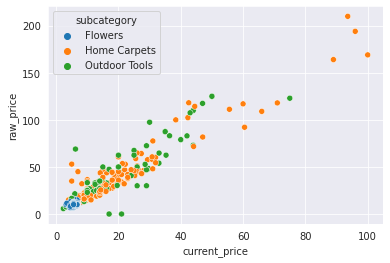

In [ ]:
sns.set_style('darkgrid')
_ = sns.scatterplot(x='current_price', y='raw_price', hue='subcategory', data=house)

Convert parameter dari 'subcategory' menjadi angka

In [ ]:
dummy = pd.get_dummies(house.subcategory)
dummy

,Flowers,Home Carpets,Outdoor Tools
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
6,1,0,0
...,...,...,...
12527,0,0,1
12535,0,1,0
12555,0,1,0
12618,1,0,0


Definisikan variabel yang akan diprediksi, yakni 'raw_price'

In [ ]:
y = house.raw_price

Gabungkan data variabel dan varian yang diprediksi

In [ ]:
X = pd.concat([house.raw_price, dummy.Flowers, dummy['Home Carpets'], dummy['Outdoor Tools']], axis=1)
X

,raw_price,Flowers,Home Carpets,Outdoor Tools
0,8.99,1,0,0
1,43.74,0,1,0
2,25.99,0,0,1
3,34.97,0,0,1
6,10.99,1,0,0
...,...,...,...,...
12527,22.99,0,0,1
12535,15.99,0,1,0
12555,38.99,0,1,0
12618,9.99,1,0,0


Lakukan proses prediksi parameter sebagai berikut

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)
X

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,raw_price,Flowers,Home Carpets,Outdoor Tools
0,1.0,8.99,1,0,0
1,1.0,43.74,0,1,0
2,1.0,25.99,0,0,1
3,1.0,34.97,0,0,1
6,1.0,10.99,1,0,0
...,...,...,...,...,...
12527,1.0,22.99,0,0,1
12535,1.0,15.99,0,1,0
12555,1.0,38.99,0,1,0
12618,1.0,9.99,1,0,0


In [ ]:
model = sm.OLS(y, X)

In [ ]:
result = model.fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              raw_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.574e+32
Date:                Sun, 02 Oct 2022   Prob (F-statistic):               0.00
Time:                        08:57:13   Log-Likelihood:                 14185.
No. Observations:                 476   AIC:                        -2.836e+04
Df Residuals:                     472   BIC:                        -2.835e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.773e-15   1.68e-15     -3.435      0.001   -9.08e-15   -2.47e-15
raw_price         1.0000   5.53e-17   1.81e+16      0.000       1.000       1.000
Flowers       -9.326e-15   1.83e-15     -5.085      0.000   -1.29e-14   -5.72e-15
Home Carpets   4.441e-16   2.01e-15      0.221      0.825   -3.51e-15     4.4e-15
Outdoor Tools  2.665e-15   2.75e-15      0.967      0.334   -2.75e-15    8.08e-15
==============================================================================
Omnibus:                      348.109   Durbin-Watson:                   0.388
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4645.399
Skew:                           3.113   Prob(JB):                         0.00
Kurtosis:                      16.981   Cond. No.                     9.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Hasil parameter yang bisa digunakan:

In [ ]:
beta = result.params
beta

const           -5.773160e-15
raw_price        1.000000e+00
Flowers         -9.325873e-15
Home Carpets     4.440892e-16
Outdoor Tools    2.664535e-15
dtype: float64

Gunakan hasil parameternya lalu visualisasikan. Hasilnya terlihat nilai y ketika diprediksi menggunakan variabel.

In [ ]:
xline = np.linspace(4, 8, 1000)
vi_yline = beta[0] + beta[1]*xline
se_yline = beta[0] + beta[1]*xline + beta[2]
ve_yline = beta[0] + beta[1]*xline + beta[3]

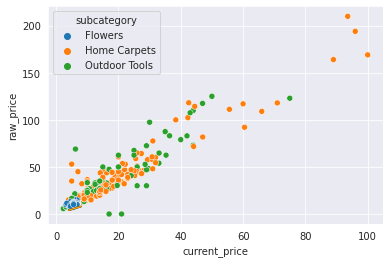

In [ ]:
sns.scatterplot(x='current_price', y='raw_price', hue='subcategory', data=house)
plt.plot(xline, vi_yline, color='darkgreen')
plt.plot(xline, se_yline, color='darkblue')
_ = plt.plot(xline, ve_yline, color='orange')

## Bayesian Statistics

### Bayes' Theorem

...memungkinkan kita menemukan $P(\text{x}|\text{y})$ bila kita memiliki $P(\text{y}|\text{x})$:
$$ P(\text{x}|\text{y}) = \frac{P(\text{x})P(\text{y}|\text{x})}{P(\text{y })} $$

Mari kita gunakan *xkcd* [exploding sun cartoon](https://xkcd.com/1132/) sebagai contoh. Dengan menggunakan ambang $\alpha = .05$ standar, frequentist menolak hipotesis nol bahwa matahari tidak meledak karena probabilitas detektor neutrino mengeluarkan `YA` ketika matahari belum meledak adalah $\frac{1}{ 6} \times \frac{1}{6} = \frac{1}{36} \approx 0,0278$, yaitu $<.05$.

Dengan menggunakan teorema Bayes, ahli statistik Bayesian memasukkan informasi tambahan -- sebagian besar terkait dengan kemungkinan bahwa matahari telah meledak terlepas dari apa yang dikatakan detektor neutrino -- untuk menarik kesimpulan yang berbeda.

Mari kita juga menggunakan beberapa angka di belakang amplop untuk memperkirakan probabilitas matahari meledak ($x = \text{exploded}$) given the neutrino detector output `YES` ($y = \text{YES}$); that is, $P(x|y)$. To find this, we'll need $P(y|x)$, $P(x)$, and $P(y)$.

$P(y = \text{YES} | x = \text{exploded}) = \frac{35}{36} \approx 0.972 $.

$P(x = \text{exploded})$ dapat diperkirakan secara kasar. Sangatlah murah hati untuk mengasumsikan peluang $\frac{1}{1000}$ karena untuk setiap seribu hari yang berlalu, matahari meledak jauh lebih jarang daripada sekali. Lebih jauh, kecuali matahari meledak hanya dalam beberapa menit terakhir, kita sudah mati. Jadi, kemungkinan bahwa kita hidup dalam sekejap di mana matahari telah meledak sangat kecil. Bagaimanapun, mari kita pergi dengan $\frac{1}{1000}$ karena bahkan dengan angka yang sangat murah hati ini, kami akan menunjukkan intinya.

$P(y = \text{YES})$: Seperti yang sering terjadi, probabilitas dalam penyebut teorema Bayes ini dapat dihitung dengan informasi yang sudah kita miliki karena:
$$ P(\text{y}) = \sum_x P(\text{y}|x)P(x) $$ 
Menjumlahkan dua kemungkinan keadaan x ($x =$ meledak, $x =$ tidak meledak):
$$ P(y = \text{YES}) = P(\text{YES given exploded})P(\text{exploded}) + P(\text{YES given not exploded})P(\text{not exploded}) $$
$$ = \left(\frac{35}{36}\right)\left(\frac{1}{1000}\right) + \left(\frac{1}{36}\right)\left(\frac{999}{1000}\right) $$ 
...yang menghasilkan $P(y = \text{YES}) \approx 0,0287$:

In [ ]:
py = (35/36.)*(1/1000.) + (1/36.)*(999/1000.)
py

0.02872222222222222

Sekarang kita memiliki semua yang kita butuhkan untuk menerapkan teorema Bayes:

In [ ]:
py_givenx = 0.972
px = .0001

In [ ]:
def bayes(my_px, my_pygivenx, my_py):
    return (my_px*my_pygivenx)/my_py

In [ ]:
bayes(px, py_givenx, py)

0.0033841392649903296

Therefore, even with our generous baseline estimate of a $\frac{1}{1000}$ chance of the sun having exploded, Bayes' rule enables us to find a 0.3% chance the sun has exploded given the neutrino detector output `YES`. Certainly odds that merit making a $50 bet! 

Oleh karena itu, bahkan dengan perkiraan dasar kami yang murah hati tentang peluang $\frac{1}{1000}$ sun having exploded, aturan Bayes memungkinkan kami menemukan peluang 0,3% sun has exploded dengan keluaran detektor neutrino `YA` . Tentu saja peluang yang pantas untuk membuat taruhan $ 50!

### Bayes' Theorem: Disease

Contoh lain penggunaan Bayes' Theorem adalah untuk menghitung kemungkinan memiliki suatu penyakit. Mari kita bayangkan bahwa seseorang kembali dari negara dan ingin memeriksa diri, apakah dia memiliki penyakit atau tidak. Dia mengambil tes dan mendapat 0,9 bahwa dia menderita penyakit, mengingat tes itu memiliki probabilitas 0,99 untuk memberikan hasil yang benar. Selain itu patut dipertimbangkan bahwa penyakit ini merupakan kejadian langka, karena hanya 0,0001 orang yang kembali dari negara tersebut yang mengidap penyakit.

$$P(A|B) = \text{Peluang seseorang memiliki penyakit} = \text?$$

$$P(B|A) = \text{Peluang seseorang memiliki penyakit setelah melakukan test} = 0.9$$

$$P(A) = \text{Peluang seseorang dapat memiliki penyakit} = 0.0001$$

$$P(B) = \text{Peluang hasil test adalah True} = \text?$$

$$P(B) = P(A) P(B|A) = 0.0001*0.9 + 0.9999 * 0.1 =  0.1$$

$$P(A|B) = \frac{0.9*0.0001}{0.1} = 0.0009$$

In [ ]:
def bayes(my_px, my_pygivenx, my_py):
    return (my_px*my_pygivenx)/my_py

In [ ]:
px = 0.9
py_givenx = 0.0001
py = 0.1

bayes(px, py_givenx, py)

0.0009

In [1]:
def bayes(my_px, my_pygivenx, my_py):
    return (my_px*my_pygivenx)/my_py

px = 1.0
py_givenx = 0.0001
py = 0.1

bayes(px, py_givenx, py)

0.001